<a href="https://colab.research.google.com/github/mohit716/nlp-knowledge-graph/blob/main/simple_knowledge_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd              # Used for handling and organizing tabular data in a DataFrame
import networkx as nx            # Used for creating and visualizing graph structures (nodes and edges)
import matplotlib.pyplot as plt  # Used for plotting and displaying the knowledge graph
from nltk import sent_tokenize, word_tokenize  # Used for splitting text into sentences and words
from nltk.corpus import stopwords              # Provides a list of common words to filter out (like 'the', 'is', etc.)
from nltk.stem import WordNetLemmatizer        # Reduces words to their base or root form (e.g., 'running' → 'run')
import nltk                         # Main Natural Language Toolkit library for NLP tasks and resource downloads


In [7]:
# Download NLTK resources
nltk.download('punkt')       # Downloads the tokenizer model used by word_tokenize() and sent_tokenize()
nltk.download('stopwords')   # Downloads the list of common stop words (like 'the', 'is', 'and')
nltk.download('wordnet')     # Downloads the WordNet lexical database used by the WordNetLemmatizer


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

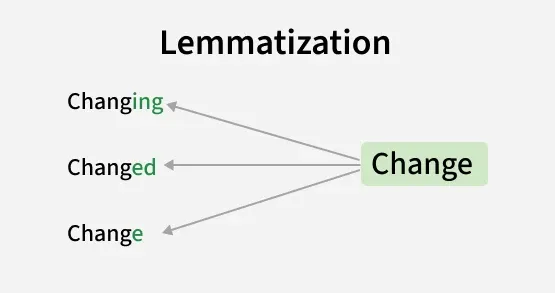

In [8]:
# summary of above all
# In this project we are building a small NLP-based Knowledge Graph.
# Pandas helps us store the example sentences and relations in a clean table.
# NLTK (with punkt, stopwords, and wordnet) is used to tokenize text, remove common words,
# and lemmatize terms so the text is clean and normalized.
# NetworkX lets us turn these entities and relations into a graph with nodes and edges,
# and Matplotlib is used to visualize that graph so we can actually see the connections.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                       sentence  \
0  Inception was directed by Christopher Nolan.   
1         Inception is a science fiction movie.   
2         Leonardo DiCaprio acted in Inception.   

                     processed_sentence  
0  inception directed christopher nolan  
1       inception science fiction movie  
2     leonardo dicaprio acted inception  


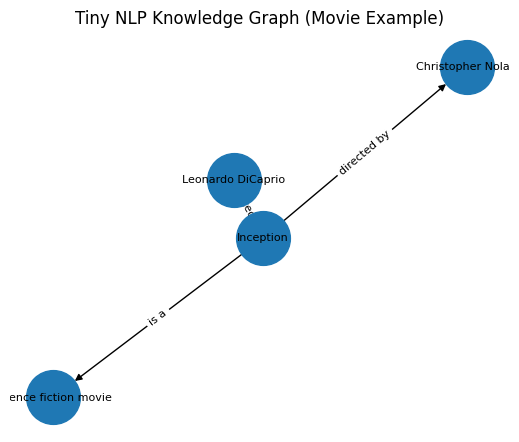

In [11]:
# Small end-to-end example: build and visualize a tiny knowledge graph from text

import pandas as pd                     # Will be used to create the DataFrame (tabular data)
import networkx as nx                   # Will be used to build and visualize the graph
import matplotlib.pyplot as plt         # Will be used to draw the graph plot
from nltk import word_tokenize          # Will be used to split sentences into words (uses 'punkt' download)
from nltk.corpus import stopwords       # Will be used to load English stopwords (uses 'stopwords' download)
from nltk.stem import WordNetLemmatizer # Will be used to lemmatize words (uses 'wordnet' download)
import nltk                             # Used to download NLTK resources

# Download required NLTK resources (these support the functions we use later)
nltk.download('punkt')       # Needed by word_tokenize()
nltk.download('punkt_tab')   # Extra tokenizer tables required by newer NLTK versions
nltk.download('stopwords')   # Needed by stopwords.words("english")
nltk.download('wordnet')     # Needed by WordNetLemmatizer()

# 1) Tiny dataset: simple movie example
data = {
    "sentence": [
        "Inception was directed by Christopher Nolan.",
        "Inception is a science fiction movie.",
        "Leonardo DiCaprio acted in Inception."
    ],
    "source":   [
        "Inception",
        "Inception",
        "Leonardo DiCaprio"
    ],
    "target":   [
        "Christopher Nolan",
        "science fiction movie",
        "Inception"
    ],
    "relation": [
        "directed by",
        "is a",
        "acted in"
    ]
}

# pandas is used here to turn the Python dict into a DataFrame
df = pd.DataFrame(data)

# 2) Simple preprocessing for the sentence column

# stopwords (from nltk.corpus) uses the 'stopwords' resource downloaded above
stop_words = set(stopwords.words("english"))

# WordNetLemmatizer uses the 'wordnet' resource downloaded above
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # word_tokenize uses the 'punkt' resource downloaded above
    words = [
        lemmatizer.lemmatize(w.lower())       # WordNetLemmatizer used here
        for w in word_tokenize(text)          # word_tokenize used here
        if w.isalnum() and w.lower() not in stop_words  # stopwords used here
    ]
    return " ".join(words)

# pandas DataFrame apply() method used here on the 'sentence' column
df["processed_sentence"] = df["sentence"].apply(preprocess_text)
print(df[["sentence", "processed_sentence"]])

# 3) Build a directed graph from source, target and relation

# NetworkX is used here to create a directed graph object
G = nx.DiGraph()

# We loop over the DataFrame rows (pandas + NetworkX together here)
for _, row in df.iterrows():
    src = row["source"]
    tgt = row["target"]
    rel = row["relation"]

    # NetworkX methods used to add nodes and edges
    G.add_node(src)
    G.add_node(tgt)
    G.add_edge(src, tgt, relation=rel)

# 4) Visualize the small knowledge graph

# NetworkX layout function used to compute positions of nodes
pos = nx.spring_layout(G, seed=42)

# NetworkX helper to get edge labels (relation names)
edge_labels = nx.get_edge_attributes(G, "relation")

# Matplotlib starts here: create a figure for our graph
plt.figure(figsize=(5, 4))

# NetworkX drawing functions use Matplotlib under the hood
nx.draw(G, pos, with_labels=True, node_size=1500, font_size=8)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=8)

# Matplotlib title and show to render the final plot
plt.title("Tiny NLP Knowledge Graph (Movie Example)")
plt.show()
